1. [Analysis of defect](#Def)
2. [Correlation](#Corr)
3. [Feature Reduction](#Red)


In [1]:
%run setup.ipynb

In [2]:
%run functions.ipynb

In [3]:
data = load_data("data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loc          5682 non-null   float64
 1   v(g)         5682 non-null   float64
 2   ev(g)        5682 non-null   float64
 3   iv(g)        5682 non-null   float64
 4   n            5682 non-null   float64
 5   v            5682 non-null   float64
 6   l            5682 non-null   float64
 7   d            5682 non-null   float64
 8   i            5682 non-null   float64
 9   e            5682 non-null   float64
 10  b            5682 non-null   float64
 11  t            5682 non-null   float64
 12  lOCode       5682 non-null   float64
 13  lOComment    5682 non-null   float64
 14  lOBlank      5682 non-null   float64
 15  uniq_Op      5682 non-null   float64
 16  uniq_Opnd    5682 non-null   float64
 17  total_Op     5682 non-null   float64
 18  total_Opnd   5682 non-null   float64
 19  branch

In [5]:
data.describe()

loc         v(g)        ev(g)        iv(g)            n  \
count  5682.000000  5682.000000  5682.000000  5682.000000  5682.000000   
mean     51.272826     7.290532     3.553819     4.738789   165.270785   
std      94.085776    16.147081     7.064771    11.410406   315.588523   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      15.000000     2.000000     1.000000     1.000000    36.000000   
50%      28.000000     4.000000     1.000000     2.000000    78.000000   
75%      57.000000     8.000000     4.000000     5.000000   172.000000   
max    3442.000000   470.000000   140.000000   402.000000  8441.000000   

                  v            l             d             i             e  \
count  5.682000e+03  5682.000000   5682.000000   5682.000000  5.682000e+03   
mean   7.003981e+03     0.445663     97.774229    244.137436  3.054108e+05   
std    5.332572e+04     2.093788    532.671603   1328.172543  3.990665e+06   
min    0.000000e+00     0.000000      0.000000      0.000000  0.000000e+00   
25%    1.555900e+02     0.040000      7.200000     18.620000  1.184315e+03   
50%    4.019100e+02     0.080000     13.315000     30.235000  5.423590e+03   
75%    1.066495e+03     0.160000     25.000000     50.377500  2.471101e+04   
max    1.712428e+06    67.000000  12577.000000  29368.000000  2.153691e+08   

                 b             t       lOCode    lOComment      lOBlank  \
count  5682.000000  5.682000e+03  5682.000000  5682.000000  5682.000000   
mean      2.360683  1.653335e+04    36.796902     4.777895     7.046990   
std      17.805151  1.976689e+05    76.409271    13.513589    13.217171   
min       0.000000  0.000000e+00     1.000000     0.000000     0.000000   
25%       0.050000  6.551000e+01     9.000000     0.000000     1.000000   
50%       0.130000  3.018700e+02    19.000000     0.000000     3.000000   
75%       0.360000  1.383000e+03    40.000000     4.000000     8.000000   
max     571.000000  1.196495e+07  2824.000000   344.000000   447.000000   

           uniq_Op    uniq_Opnd     total_Op   total_Opnd  branchCount  
count  5682.000000  5682.000000  5682.000000  5682.000000  5682.000000  
mean     14.321964    23.866667    98.936008    66.468567    13.023900  
std      11.447604    34.480194   191.672138   126.923082    27.180578  
min       0.000000     0.000000     0.000000     0.000000     1.000000  
25%       9.000000     8.000000    22.000000    14.000000     3.000000  
50%      13.000000    16.000000    47.000000    31.000000     7.000000  
75%      18.000000    28.000000   103.000000    69.000000    13.000000  
max     411.000000  1026.000000  5420.000000  3021.000000   826.000000

<a id='Def'></a> **1. Analysis of "defect"**

With the following instruction it will be analized only the variable that is not numeric, "defects", in order to see how many occurrence there are of the two type.

It's possible to see that the two classes are not homogeneus. The class "False" count 3632 object, the 90%, and the other class "True" has only 2050 observation.

In [6]:
Count("defects")

counts      %
False    3632  63.92
True     2050  36.08

Saving figure defects_histogram_plots


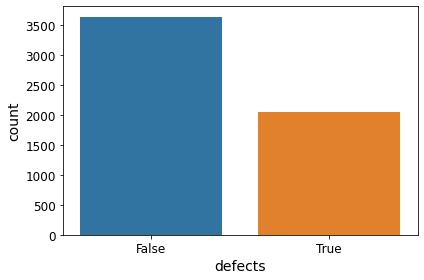

In [7]:
sns.countplot(x=data["defects"])
save_fig("defects_histogram_plots")

Let's analyze also the relation between complexity and defects.

Saving figure defect_vg_histogram_plots


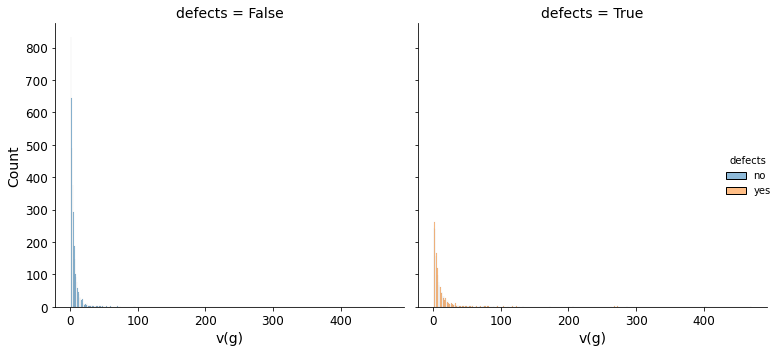

In [8]:
Hist_def_vg()

In order to prepare the dataset for the programs of feauture selection, it is usefull to convert the categorical variable to a numeric one. It is not an ordinal variable but it is categorical, so it's used the encodel label process. The label "true" is encoded with "0" and the label "false" with "1".

In [9]:
data["defects"] = LabelEncoder().fit_transform(data["defects"])

data["defects"].value_counts()

0    3632
1    2050
Name: defects, dtype: int64

<a id='Corr'></a> **1 Correlation**

Let's now consider the matrix of correlations between the attributes

In [10]:
data.corr()

loc      v(g)     ev(g)     iv(g)         n         v  \
loc          1.000000  0.828601  0.539237  0.814588  0.942874  0.131194   
v(g)         0.828601  1.000000  0.669909  0.857150  0.779783  0.148693   
ev(g)        0.539237  0.669909  1.000000  0.611883  0.547422  0.112842   
iv(g)        0.814588  0.857150  0.611883  1.000000  0.754049  0.135179   
n            0.942874  0.779783  0.547422  0.754049  1.000000  0.216817   
v            0.131194  0.148693  0.112842  0.135179  0.216817  1.000000   
l           -0.061388 -0.041473 -0.047187 -0.033350 -0.043830  0.152655   
d            0.075016  0.106332  0.077668  0.088099  0.155076  0.785491   
i            0.064016  0.072027  0.053418  0.069691  0.139644  0.764090   
e            0.205351  0.225794  0.142258  0.223282  0.260470  0.826832   
b            0.130246  0.146263  0.112250  0.133328  0.216756  0.975122   
t            0.211741  0.232214  0.139787  0.229725  0.264098  0.778022   
lOCode       0.981692  0.848965  0.532474  0.833773  0.921046  0.018420   
lOComment    0.568889  0.386094  0.329685  0.360126  0.562549  0.508833   
lOBlank      0.803542  0.558443  0.389364  0.568404  0.771794  0.355152   
uniq_Op      0.622455  0.784892  0.351612  0.605201  0.591450  0.209058   
uniq_Opnd    0.826042  0.767803  0.405557  0.670307  0.832983  0.284191   
total_Op     0.942249  0.794613  0.563687  0.769989  0.995684  0.217910   
total_Opnd   0.927614  0.740954  0.510689  0.714211  0.989369  0.210232   
branchCount  0.850415  0.969001  0.763838  0.859768  0.812980  0.155556   
defects      0.203621  0.179531  0.158940  0.165117  0.196638 -0.019300   

                    l         d         i         e  ...         t    lOCode  \
loc         -0.061388  0.075016  0.064016  0.205351  ...  0.211741  0.981692   
v(g)        -0.041473  0.106332  0.072027  0.225794  ...  0.232214  0.848965   
ev(g)       -0.047187  0.077668  0.053418  0.142258  ...  0.139787  0.532474   
iv(g)       -0.033350  0.088099  0.069691  0.223282  ...  0.229725  0.833773   
n           -0.043830  0.155076  0.139644  0.260470  ...  0.264098  0.921046   
v            0.152655  0.785491  0.764090  0.826832  ...  0.778022  0.018420   
l            1.000000  0.258824  0.333343  0.053455  ...  0.061493 -0.082183   
d            0.258824  1.000000  0.687620  0.647688  ...  0.649983 -0.016350   
i            0.333343  0.687620  1.000000  0.477432  ...  0.456627 -0.034052   
e            0.053455  0.647688  0.477432  1.000000  ...  0.860959  0.117430   
b            0.161702  0.759892  0.789454  0.820931  ...  0.767481  0.018105   
t            0.061493  0.649983  0.456627  0.860959  ...  1.000000  0.129014   
lOCode      -0.082183 -0.016350 -0.034052  0.117430  ...  0.129014  1.000000   
lOComment    0.062623  0.396135  0.394534  0.429711  ...  0.426669  0.426326   
lOBlank      0.028382  0.309079  0.292105  0.334112  ...  0.326042  0.724089   
uniq_Op     -0.026549  0.202121  0.148895  0.228829  ...  0.235442  0.626674   
uniq_Opnd   -0.024861  0.196202  0.231930  0.278742  ...  0.277508  0.805679   
total_Op    -0.041674  0.157932  0.140710  0.263946  ...  0.267976  0.920618   
total_Opnd  -0.046159  0.147030  0.134764  0.249383  ...  0.252361  0.906015   
branchCount -0.047076  0.110443  0.079551  0.223255  ...  0.232203  0.860558   
defects     -0.093162 -0.045847 -0.037969 -0.010205  ... -0.002436  0.194589   

             lOComment   lOBlank   uniq_Op  uniq_Opnd  total_Op  total_Opnd  \
loc           0.568889  0.803542  0.622455   0.826042  0.942249    0.927614   
v(g)          0.386094  0.558443  0.784892   0.767803  0.794613    0.740954   
ev(g)         0.329685  0.389364  0.351612   0.405557  0.563687    0.510689   
iv(g)         0.360126  0.568404  0.605201   0.670307  0.769989    0.714211   
n             0.562549  0.771794  0.591450   0.832983  0.995684    0.989369   
v             0.508833  0.355152  0.209058   0.284191  0.217910    0.210232   
l             0.062623  0.028382 -0.026549  -0.024861

This matrix is unreadable, there are too many variables. Let's create a "heatmap" to understand better what are the powerfull correlations. (The definition of the function is in the "functions" file.)

Saving figure heatmap


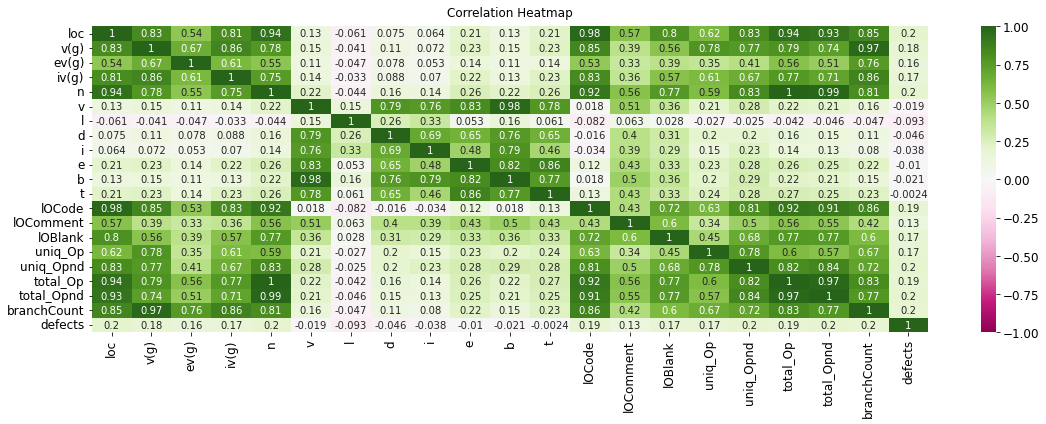

In [11]:
correlation(data) 

he goal of this research is to figure out which of the consider attributes can be used to predict complexity "v(g)", so it can be useful to derive the correlation of all the attribute with this variable, instead of considering all the possible couple.

Let's separate the target y from the independent variable X

in order to  doing this, for semplicity, the variable of interest "complexity v(g)" is moved after the last column

In [12]:
col = data.pop('v(g)')
data.insert(20, col.name, col)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loc          5682 non-null   float64
 1   ev(g)        5682 non-null   float64
 2   iv(g)        5682 non-null   float64
 3   n            5682 non-null   float64
 4   v            5682 non-null   float64
 5   l            5682 non-null   float64
 6   d            5682 non-null   float64
 7   i            5682 non-null   float64
 8   e            5682 non-null   float64
 9   b            5682 non-null   float64
 10  t            5682 non-null   float64
 11  lOCode       5682 non-null   float64
 12  lOComment    5682 non-null   float64
 13  lOBlank      5682 non-null   float64
 14  uniq_Op      5682 non-null   float64
 15  uniq_Opnd    5682 non-null   float64
 16  total_Op     5682 non-null   float64
 17  total_Opnd   5682 non-null   float64
 18  branchCount  5682 non-null   float64
 19  defect

In [13]:
X = data.iloc[:,0:20]  
y = data.iloc[:,-1]    #target column i.e "v(g)"

Let's analyze the correlation with this variable

In [14]:
data.corr()["v(g)"].sort_values(ascending=False)

v(g)           1.000000
branchCount    0.969001
iv(g)          0.857150
lOCode         0.848965
loc            0.828601
total_Op       0.794613
uniq_Op        0.784892
n              0.779783
uniq_Opnd      0.767803
total_Opnd     0.740954
ev(g)          0.669909
lOBlank        0.558443
lOComment      0.386094
t              0.232214
e              0.225794
defects        0.179531
v              0.148693
b              0.146263
d              0.106332
i              0.072027
l             -0.041473
Name: v(g), dtype: float64

According to this output the variables that influence the most the Complexity are the Count of the branch, design complexity, and line of code

In [15]:
data['v(g)'].describe()

count    5682.000000
mean        7.290532
std        16.147081
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max       470.000000
Name: v(g), dtype: float64

In the research: "It is important to note that for prediction purpose we assign two classes for complexity the first class is “high”if complexity value is greater than 20, second class is “Low” if complexity is less than 20." 

wikipedia: In his presentation 'Software Quality Metrics to Identify Risk'[8] for the Department of Homeland Security, Tom McCabe introduces the following categorisation to interpret cyclomatic complexity:

1 - 10 Simple procedure, little risk
11 - 20 More complex, moderate risk
21 - 50 Complex, high risk
> 50 Untestable code, very high risk

LEt's suddivide it

In [16]:
data["v(g)_cat"] = pd.cut(data["v(g)"], bins=[min(data['v(g)'])-1, 10, 20, 50, max(data['v(g)'])+1], labels=[0, 1, 2, 3])
data["v(g)_cat"].value_counts()

0    4730
1     610
2     278
3      64
Name: v(g)_cat, dtype: int64

Saving figure hist_v(g)


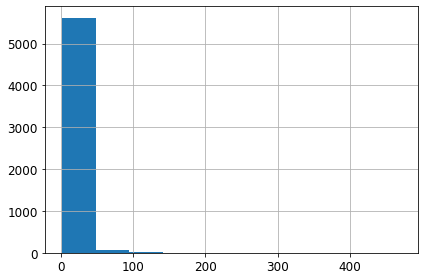

In [17]:
data['v(g)'].hist()
save_fig("hist_v(g)")

In [18]:
sns.countplot(x=data["v(g)_cat"])
save_fig("hist_v(g)_cat")

Saving figure hist_v(g)_cat


In [19]:
y2 = data['v(g)_cat'] 

<a id='Red'></a> **3 Feature Reduction**

According to the research "Software Complexity Prediction by Using Basic Attributes " made by Rasha Gaffer. M. Helali it is possible to reduce the space of the attributes. The researcher drop 4 variable ("design complexity iv(g)", "essential complexity ev(g)", "b" and time estimator "t"). To verify this assumption i decised to to apply two different methods of reducing feature to see if this methods agree with the researcher.

In [20]:
X = data.iloc[:,0:21]  
y2 = data['v(g)_cat']    #target column i.e "v(g)"

In [21]:
Information_Gain(X, y2, data)
save_fig("information gain")

defects        0.026843
lOComment      0.088144
i              0.127520
lOBlank        0.129653
uniq_Opnd      0.188913
uniq_Op        0.209897
l              0.218667
d              0.228798
ev(g)          0.241496
lOCode         0.245079
e              0.248384
t              0.248489
total_Opnd     0.258785
v              0.260308
loc            0.262067
b              0.263927
n              0.270036
total_Op       0.270427
iv(g)          0.312467
branchCount    0.552276
v(g)           0.590370
dtype: float64
Saving figure information gain


<Figure size 432x288 with 0 Axes>

According to this method the most important future is "branchCount" followed by "iv(g)" and "n". "branchCount", "iv(g) and "loc" were also high correlated with the complexity feature. The less important future are "lOCode", "i, "lOBlank".

Another algorithm for feature reduction is a graphical method:

[0.03607931 0.08623225 0.09140427 0.04178949 0.00893859 0.00773483
 0.01090619 0.0082336  0.00909053 0.00935118 0.01029387 0.04444107
 0.01904118 0.01875384 0.02749346 0.02478621 0.03719406 0.03304275
 0.22583679 0.01231042 0.23704612]
Saving figure graph_select_features


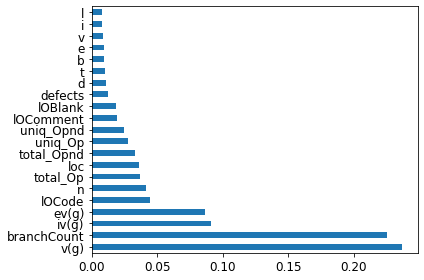

Saving figure imp_features


<Figure size 432x288 with 0 Axes>

In [22]:
graph_features(X,y2)
save_fig("imp_features")

These results are not in agreement with the research, so i decided to maintain them all in order to see the differences.

In [23]:
data.to_csv(f'{DATA_PATH}/data.csv', sep=';', index=False)